In [117]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA


In [118]:
_ARREST_KEY = "ARREST_KEY"

_ARREST_BORO = "ARREST_BORO"
_JURISDICTION_CODE = "JURISDICTION_CODE"
_OFFENSE_LEVEL = "LAW_CAT_CD"

_ARREST_DATE = "ARREST_DATE"
_ARREST_MONTH = "ARREST_MONTH" 

_ARREST_PRECINCT = "ARREST_PRECINCT"

_PERPETRATOR_RACE = "PERP_RACE"
_PERPETRATOR_SEX = "PERP_SEX"
_PERPETRATOR_AGE_GROUP="AGE_GROUP"

_INTERNAL_CLASSIFICATION="PD_CD"
_INTERNAL_CLASSIFICATION_DESCRIPTION="PD_DESC"
_THREE_DIGIT_INTERNAL_CLASSIFICATION="KY_CD"

_LAW_CODE="LAW_CODE"

_GEOGRAPHICAL_POSITION = "New Georeferenced Column"

_NYS_X_COORD = "X_COORD_CD"
_NYS_Y_COORD = "Y_COORD_CD"

_LATITUDE='Latitude'
_LONGITUDE='Longitude'


In [119]:
df = pd.read_csv('./cleaned_data.csv')
df.head()


,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,ARREST_MONTH
0,FELONY ASSAULT,PL-1211200,F,Q,105,0,40.737043,-73.735514,January
1,FELONY ASSAULT,PL-1200502,F,B,48,0,40.855109,-73.892818,March
2,FELONY ASSAULT,PL-1200512,F,S,121,0,40.628967,-74.163275,May
3,FELONY ASSAULT,PL-1211200,F,Q,100,0,40.591980,-73.800066,June
4,RAPE,PL-1302503,F,M,14,0,40.753533,-73.994537,January


In [120]:
df[_ARREST_PRECINCT] = df[_ARREST_PRECINCT].astype('object')
df[_JURISDICTION_CODE] = df[_JURISDICTION_CODE].astype('object')

In [121]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188682 entries, 0 to 188681
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Latitude   188682 non-null  float64
 1   Longitude  188682 non-null  float64
dtypes: float64(2)
memory usage: 2.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188682 entries, 0 to 188681
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   OFNS_DESC          188682 non-null  object
 1   LAW_CODE           188682 non-null  object
 2   LAW_CAT_CD         188682 non-null  object
 3   ARREST_BORO        188682 non-null  object
 4   ARREST_PRECINCT    188682 non-null  object
 5   JURISDICTION_CODE  188682 non-null  object
 6   ARREST_MONTH       188682 non-null  object
dtypes: object(7)
memory usage: 10.1+ MB


In [122]:
df_obj[_OFFENSE_LEVEL].unique()
#df_obj=df_obj.drop(columns=["OFNS_DESC","LAW_CODE"])# drop some columns to deal with long fit time
df_obj

,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,ARREST_MONTH
0,FELONY ASSAULT,PL-1211200,F,Q,105,0,January
1,FELONY ASSAULT,PL-1200502,F,B,48,0,March
2,FELONY ASSAULT,PL-1200512,F,S,121,0,May
3,FELONY ASSAULT,PL-1211200,F,Q,100,0,June
4,RAPE,PL-1302503,F,M,14,0,January
...,...,...,...,...,...,...,...
188677,PETIT LARCENY,PL-1552500,M,Q,109,0,September
188678,ASSAULT 3 & RELATED OFFENSES,PL-1200001,M,M,34,0,September
188679,BURGLARY,PL-1402501,F,M,23,0,September
188680,OTHER OFFENSES RELATED TO THEFT,PL-1651503,M,B,44,1,September


In [123]:
# df_obj= pd.get_dummies(df_obj, drop_first=True)

# target = (df_obj['LAW_CAT_CD_M'])
# df_obj = df_obj.drop(columns=['LAW_CAT_CD_M'],axis=1)
# df_obj

In [124]:
df_num

,Latitude,Longitude
0,40.737043,-73.735514
1,40.855109,-73.892818
2,40.628967,-74.163275
3,40.591980,-73.800066
4,40.753533,-73.994537
...,...,...
188677,40.757691,-73.834115
188678,40.856808,-73.928265
188679,40.786116,-73.942614
188680,40.827812,-73.925929


In [125]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

numScaler = StandardScaler()
catEncoder = OneHotEncoder(sparse_output=False)
# Fit and transform the data
#df_num = pd.DataFrame(numScaler.fit_transform(df_num), columns=df_num.columns)
# enc= catEncoder.fit_transform(df_obj)
# catEncoder.get_feature_names_out().size
# enc.shape

enc = catEncoder.fit_transform(df_obj)
scaled = numScaler.fit_transform(df_num)


In [126]:
catEncoder.get_feature_names_out()

array(['OFNS_DESC_ADMINISTRATIVE CODE', 'OFNS_DESC_ADMINISTRATIVE CODES',
       'OFNS_DESC_ALCOHOLIC BEVERAGE CONTROL LAW', ...,
       'ARREST_MONTH_March', 'ARREST_MONTH_May', 'ARREST_MONTH_September'],
      dtype=object)

In [127]:
df_obj = pd.DataFrame(enc, columns=catEncoder.get_feature_names_out())


In [128]:
# Don't scale longitude/latitude so we can interpret them later
#df_num = pd.DataFrame(scaled, columns=numScaler.get_feature_names_out())

In [129]:
#attr = pd.concat([df_obj,df_num],axis=1)
# Only perform clustering on numerical data
attr = df_num
target = df_obj["LAW_CAT_CD_M"]

In [130]:
attr.head()

,Latitude,Longitude
0,40.737043,-73.735514
1,40.855109,-73.892818
2,40.628967,-74.163275
3,40.591980,-73.800066
4,40.753533,-73.994537


In [131]:
# PCA
pca=  PCA(n_components=2)
attr_pca = pca.fit_transform(attr)
attr_pca

array([[ 0.16547217,  0.08794575],
       [-0.02880737,  0.11859846],
       [-0.16187038, -0.20786965],
       ...,
       [-0.0404956 ,  0.03431881],
       [-0.04527989,  0.07897318],
       [-0.03655311,  0.11390287]])

In [132]:
# Perform K-means clustering
num_clusters = 3  # Use three clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=12)
kmeans.fit(attr_pca)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [133]:
# Show the output of kmeans clustering
import pandas as pd
df_cluster=pd.DataFrame({'Actual':target,'Cluster':labels})
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

Cluster      0  1      2
Actual                  
0.0      41351  0  41103
1.0      55092  1  51135


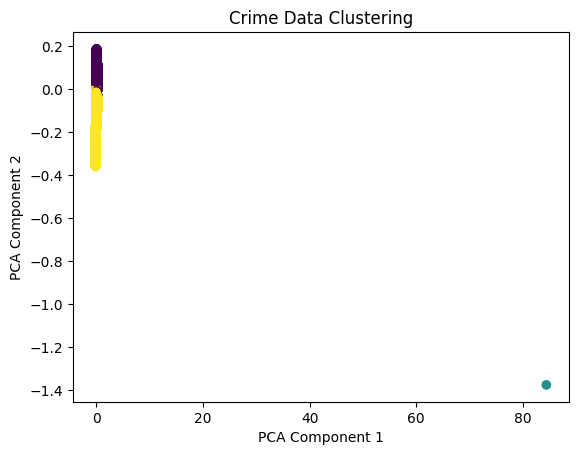

In [134]:
plt.scatter(attr_pca[:, 0], attr_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Crime Data Clustering')
plt.show()

In [139]:
firstCluster = attr_pca[kmeans.labels_ == 0]
secondCluster = attr_pca[kmeans.labels_ == 1]
thirdCluster = attr_pca[kmeans.labels_ == 2]
firstCluster

array([[ 0.16547217,  0.08794575],
       [-0.02880737,  0.11859846],
       [-0.0573332 ,  0.05481851],
       ...,
       [-0.0404956 ,  0.03431881],
       [-0.04527989,  0.07897318],
       [-0.03655311,  0.11390287]])

In [140]:
secondCluster

array([[84.39309277, -1.37514188]])

In [141]:
thirdCluster

array([[-0.16187038, -0.20786965],
       [ 0.17637009, -0.07045712],
       [-0.07111396, -0.01878651],
       ...,
       [ 0.01448518, -0.1716761 ],
       [-0.14995343, -0.3119798 ],
       [ 0.0696195 , -0.04848604]])

In [153]:
df_num['Cluster'] = labels

for cluster in df_num['Cluster'].unique():
    print(f"Cluster {cluster+1}:")
    print(df_num[df_num['Cluster'] == cluster])
    print("\n")


Cluster 1:
         Latitude  Longitude  Cluster
0       40.737043 -73.735514        0
1       40.855109 -73.892818        0
9       40.812114 -73.947891        0
10      40.823378 -73.870168        0
13      40.677251 -73.826039        0
...           ...        ...      ...
188677  40.757691 -73.834115        0
188678  40.856808 -73.928265        0
188679  40.786116 -73.942614        0
188680  40.827812 -73.925929        0
188681  40.854588 -73.901861        0

[96443 rows x 3 columns]


Cluster 3:
         Latitude  Longitude  Cluster
2       40.628967 -74.163275        2
3       40.591980 -73.800066        2
4       40.753533 -73.994537        2
5       40.695439 -73.983225        2
6       40.639436 -73.965983        2
...           ...        ...      ...
188672  40.720143 -73.997702        2
188673  40.658571 -73.908870        2
188674  40.578358 -73.990504        2
188675  40.531398 -74.201501        2
188676  40.661385 -73.884098        2

[92238 rows x 3 columns]


Cluster 2: